# Capstone project EDA

### By Victor Ramirez

In [1]:
# Import the libraries we'll use below.

# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import math
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
from keras import models
from keras import layers

# plots
import seaborn as sns  # for nicer plots
import matplotlib.pyplot as plt

sns.set(style="darkgrid")  # default style
import plotly.express as px

from scipy import stats # For in-built method to get PCC

random.seed(2)
%matplotlib inline

## Understanding the data

Before doing any training (or evaluating), let's make sure we understand what we're working with. 

### Load the data

We'll only use a few of the columns.

In [2]:
# Load the data from a CSV file into a pandas dataframe. Remember that each row
# is an example and each column in a feature.
sf_data = pd.read_csv(
    'F:/code/uc berkeley/mids-210/datasciw210/EDA/Police_Department_Incident_Reports__2018_to_Present.csv'
    # '/Users/RamirezV/Documents/GitHub/uc berkeley/210/datasciw210/EDA/Police_Department_Incident_Reports__2018_to_Present.csv'
)

# ca_data = pd.read_csv(
#     'F:/code/uc berkeley/mids-210/datasciw210/EDA/hci_crime_752_pl_co_re_ca_2000-2013_21oct15-ada.xlsx'
# )

# sf_data.drop(columns=['location'], inplace = True)


## Read data

In [10]:
sf_data.dtypes


Incident_Datetime                                        object
Incident_Date                                            object
Incident_Time                                            object
Incident_Year                                             int64
Incident_Day_of_Week                                     object
Report_Datetime                                          object
Row_ID                                                    int64
Incident_ID                                               int64
Incident_Number                                           int64
CAD_Number                                              float64
Report_Type_Code                                         object
Report_Type_Description                                  object
Filed_Online                                             object
Incident_Code                                             int64
Incident_Category                                        object
Incident_Subcategory                    

In [11]:
sf_data.count()      # Used to count the number of rows

Incident_Datetime                                       690745
Incident_Date                                           690745
Incident_Time                                           690745
Incident_Year                                           690745
Incident_Day_of_Week                                    690745
Report_Datetime                                         690745
Row_ID                                                  690745
Incident_ID                                             690745
Incident_Number                                         690745
CAD_Number                                              536121
Report_Type_Code                                        690745
Report_Type_Description                                 690745
Filed_Online                                            139069
Incident_Code                                           690745
Incident_Category                                       690179
Incident_Subcategory                                   

In [3]:
# data EDA
print(sf_data.describe())

       Incident Year        Row ID   Incident ID  Incident Number  \
count  690745.000000  6.907450e+05  6.907450e+05     6.907450e+05   
mean     2019.958135  9.302732e+10  9.302729e+05     2.011725e+08   
std         1.477545  1.787198e+10  1.787198e+05     1.534261e+07   
min      2018.000000  6.186871e+10  6.186870e+05     0.000000e+00   
25%      2019.000000  7.757161e+10  7.757160e+05     1.901730e+08   
50%      2020.000000  9.298990e+10  9.298990e+05     2.003680e+08   
75%      2021.000000  1.084700e+11  1.084700e+06     2.108237e+08   
max      2023.000000  1.240776e+11  1.240775e+06     9.814243e+08   

         CAD Number  Incident Code           CNN  Supervisor District  \
count  5.361210e+05  690745.000000  6.540610e+05        654061.000000   
mean   2.020950e+08   24602.353554  2.532055e+07             5.965713   
std    2.378168e+07   25645.896287  3.093293e+06             2.807968   
min    1.000000e+00    1000.000000  2.001300e+07             1.000000   
25%    1.9066

In [13]:
sf_data = sf_data.drop_duplicates()
sf_data.head(5)

,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,CAD_Number,...,Longitude,Point,Neighborhoods,ESNCAG_-_Boundary_File,Central_Market/Tenderloin_Boundary_Polygon_-_Updated,Civic_Center_Harm_Reduction_Project_Boundary,HSOC_Zones_as_of_2018-06-05,Invest_In_Neighborhoods_(IIN)_Areas,Current_Supervisor_Districts,Current_Police_Districts
370755,2019/06/06 05:00:00 AM,2019/06/06,05:00,2019,Thursday,2019/06/06 12:13:00 PM,80911206224,809112,196110014,NaN,...,-122.414711,POINT (-122.41471100473302 37.77623051953945),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
18943,2021/06/11 11:00:00 AM,2021/06/11,11:00,2021,Friday,2021/06/11 11:35:00 AM,103930628150,1039306,210363199,211621354.0,...,-122.408709,POINT (-122.4087086749172 37.780971182329765),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
243696,2021/05/04 06:29:00 PM,2021/05/04,18:29,2021,Tuesday,2021/05/04 06:35:00 PM,102731415161,1027314,210273764,211242798.0,...,-122.420581,POINT (-122.42058060938771 37.76499626872751),53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
486709,2019/12/07 05:00:00 PM,2019/12/07,17:00,2019,Saturday,2020/02/26 01:32:00 PM,90732806244,907328,196269508,NaN,...,-122.410937,POINT (-122.41093657493794 37.77921168445851),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
565267,2020/11/16 01:22:00 PM,2020/11/16,13:22,2020,Monday,2020/11/16 02:00:00 PM,97893506361,978935,200692481,203211767.0,...,-122.413975,POINT (-122.41397500878728 37.80748251193778),99.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0


In [14]:
sf_data.count()

Incident_Datetime                                       690745
Incident_Date                                           690745
Incident_Time                                           690745
Incident_Year                                           690745
Incident_Day_of_Week                                    690745
Report_Datetime                                         690745
Row_ID                                                  690745
Incident_ID                                             690745
Incident_Number                                         690745
CAD_Number                                              536121
Report_Type_Code                                        690745
Report_Type_Description                                 690745
Filed_Online                                            139069
Incident_Code                                           690745
Incident_Category                                       690179
Incident_Subcategory                                   

In [5]:
# data cleaning

# check for null values
print(sf_data.isnull().sum())

columns = sf_data.columns
##################
### DROP zeros ###
##################
for col in columns:
    if (sf_data[col] == 0).all():
        print('All values in ', col ,' column are zero dropping col')
        del sf_data[col]
    else:
        print('All values in ', col ,' column are not zero')
    

print('Number of features: %s' %sf_data.shape[1])
print('Number of examples: %s' %sf_data.shape[0])

# print('Number of location', len(pd.unique(sf_data['location'])))

# Find unique values of a column
# print(sf_data['location'].unique())

print(sf_data.columns.tolist())

print('Columns in my data: ', sf_data.columns.tolist())


Incident Datetime                                            0
Incident Date                                                0
Incident Time                                                0
Incident Year                                                0
Incident Day of Week                                         0
Report Datetime                                              0
Row ID                                                       0
Incident ID                                                  0
Incident Number                                              0
CAD Number                                              154624
Report Type Code                                             0
Report Type Description                                      0
Filed Online                                            551676
Incident Code                                                0
Incident Category                                          566
Incident Subcategory                                   

In [6]:
# replace white spaces with underscore
sf_data.columns = sf_data.columns.str.replace(' ', '_')
print(sf_data.columns.tolist())

['Incident_Datetime', 'Incident_Date', 'Incident_Time', 'Incident_Year', 'Incident_Day_of_Week', 'Report_Datetime', 'Row_ID', 'Incident_ID', 'Incident_Number', 'CAD_Number', 'Report_Type_Code', 'Report_Type_Description', 'Filed_Online', 'Incident_Code', 'Incident_Category', 'Incident_Subcategory', 'Incident_Description', 'Resolution', 'Intersection', 'CNN', 'Police_District', 'Analysis_Neighborhood', 'Supervisor_District', 'Latitude', 'Longitude', 'Point', 'Neighborhoods', 'ESNCAG_-_Boundary_File', 'Central_Market/Tenderloin_Boundary_Polygon_-_Updated', 'Civic_Center_Harm_Reduction_Project_Boundary', 'HSOC_Zones_as_of_2018-06-05', 'Invest_In_Neighborhoods_(IIN)_Areas', 'Current_Supervisor_Districts', 'Current_Police_Districts']


In [8]:
# shuffle order
indices = np.arange(sf_data.shape[0])
print('indices:', indices, '\n')

# set seed
np.random.seed(0)
shuffled_indices = np.random.permutation(indices)
print('shuffled indices:', shuffled_indices, '\n')

# reindex to change the ordering of the original
sf_data = sf_data.reindex(shuffled_indices)
display(sf_data)


indices: [     0      1      2 ... 690742 690743 690744] 

shuffled indices: [370755  18943 243696 ... 117952 435829 305711] 



,Incident_Datetime,Incident_Date,Incident_Time,Incident_Year,Incident_Day_of_Week,Report_Datetime,Row_ID,Incident_ID,Incident_Number,CAD_Number,...,Longitude,Point,Neighborhoods,ESNCAG_-_Boundary_File,Central_Market/Tenderloin_Boundary_Polygon_-_Updated,Civic_Center_Harm_Reduction_Project_Boundary,HSOC_Zones_as_of_2018-06-05,Invest_In_Neighborhoods_(IIN)_Areas,Current_Supervisor_Districts,Current_Police_Districts
370755,2019/06/06 05:00:00 AM,2019/06/06,05:00,2019,Thursday,2019/06/06 12:13:00 PM,80911206224,809112,196110014,NaN,...,-122.414711,POINT (-122.41471100473302 37.77623051953945),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
18943,2021/06/11 11:00:00 AM,2021/06/11,11:00,2021,Friday,2021/06/11 11:35:00 AM,103930628150,1039306,210363199,211621354.0,...,-122.408709,POINT (-122.4087086749172 37.780971182329765),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
243696,2021/05/04 06:29:00 PM,2021/05/04,18:29,2021,Tuesday,2021/05/04 06:35:00 PM,102731415161,1027314,210273764,211242798.0,...,-122.420581,POINT (-122.42058060938771 37.76499626872751),53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
486709,2019/12/07 05:00:00 PM,2019/12/07,17:00,2019,Saturday,2020/02/26 01:32:00 PM,90732806244,907328,196269508,NaN,...,-122.410937,POINT (-122.41093657493794 37.77921168445851),32.0,NaN,1.0,1.0,1.0,NaN,10.0,1.0
565267,2020/11/16 01:22:00 PM,2020/11/16,13:22,2020,Monday,2020/11/16 02:00:00 PM,97893506361,978935,200692481,203211767.0,...,-122.413975,POINT (-122.41397500878728 37.80748251193778),99.0,NaN,NaN,NaN,NaN,NaN,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,2019/06/17 01:22:00 PM,2019/06/17,13:22,2019,Monday,2019/06/17 01:22:00 PM,81257512015,812575,190435917,191682034.0,...,-122.416720,POINT (-122.41671959504018 37.75716664165998),53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0
152315,2022/06/08 10:10:00 PM,2022/06/08,22:10,2022,Wednesday,2022/06/08 11:44:00 PM,115891919057,1158919,220376790,221593357.0,...,-122.426180,POINT (-122.42618004477822 37.80109545463191),17.0,NaN,NaN,NaN,NaN,NaN,6.0,4.0
117952,2022/02/19 11:30:00 PM,2022/02/19,23:30,2022,Saturday,2022/02/20 10:19:00 AM,112521006372,1125210,226028410,NaN,...,-122.434405,POINT (-122.43440469982856 37.80005154768055),NaN,NaN,NaN,NaN,NaN,NaN,6.0,4.0
435829,2019/12/04 11:21:00 PM,2019/12/04,23:21,2019,Wednesday,2019/12/04 11:21:00 PM,87724765010,877247,190915038,193384499.0,...,-122.415251,POINT (-122.41525065017504 37.764705299011204),53.0,NaN,NaN,NaN,3.0,NaN,2.0,3.0


## Visual EDA

In [16]:
print(sf_data.columns.tolist())

['Incident_Datetime', 'Incident_Date', 'Incident_Time', 'Incident_Year', 'Incident_Day_of_Week', 'Report_Datetime', 'Row_ID', 'Incident_ID', 'Incident_Number', 'CAD_Number', 'Report_Type_Code', 'Report_Type_Description', 'Filed_Online', 'Incident_Code', 'Incident_Category', 'Incident_Subcategory', 'Incident_Description', 'Resolution', 'Intersection', 'CNN', 'Police_District', 'Analysis_Neighborhood', 'Supervisor_District', 'Latitude', 'Longitude', 'Point', 'Neighborhoods', 'ESNCAG_-_Boundary_File', 'Central_Market/Tenderloin_Boundary_Polygon_-_Updated', 'Civic_Center_Harm_Reduction_Project_Boundary', 'HSOC_Zones_as_of_2018-06-05', 'Invest_In_Neighborhoods_(IIN)_Areas', 'Current_Supervisor_Districts', 'Current_Police_Districts']


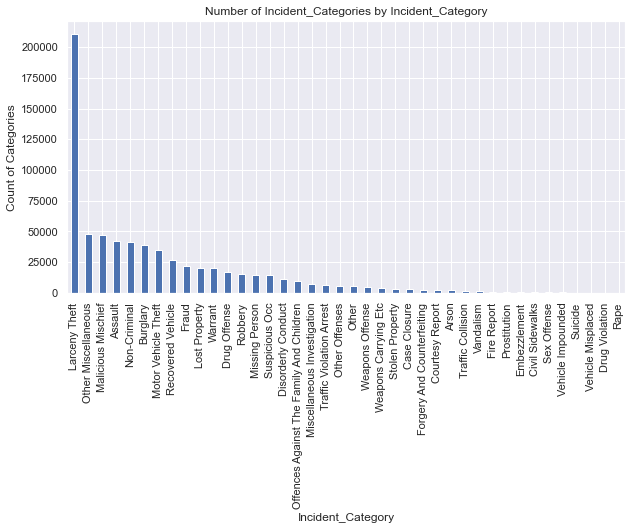

In [21]:
sf_data.Incident_Category.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Incident_Categories by Incident_Category")
plt.ylabel('Count of Categories')
plt.xlabel('Incident_Category');

In [ ]:
plt.figure(figsize=(10,5))
c= sf_data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
# visual hate_crime_incident_count summary in a treemap plot

# fig = px.treemap(fbi_data, path=[px.Constant("hate_crime_incident_count EDA"), 'location', 'year', 'month'], 
                 # values='hate_crime_incident_count')
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

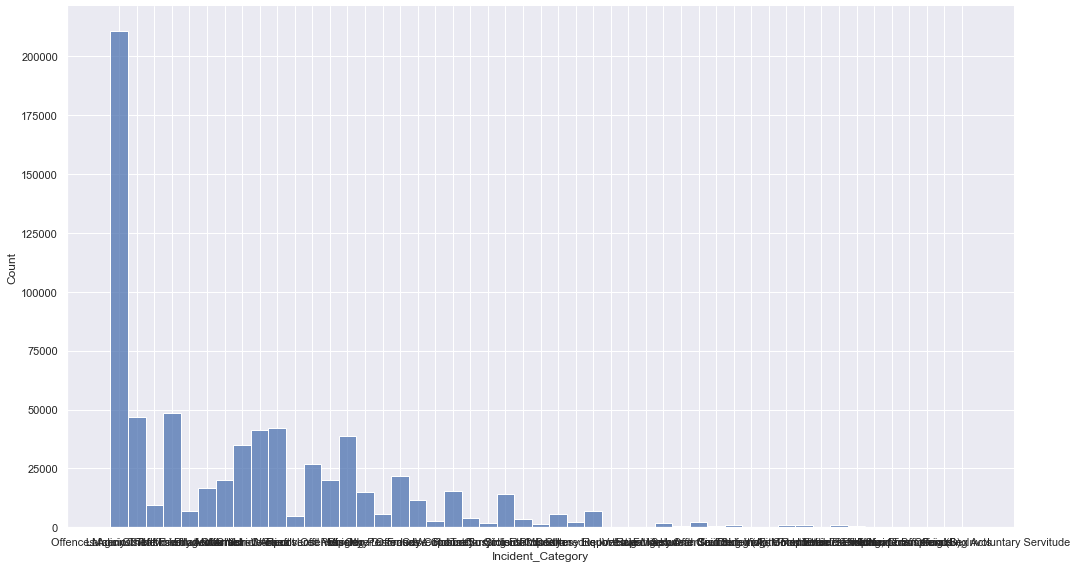

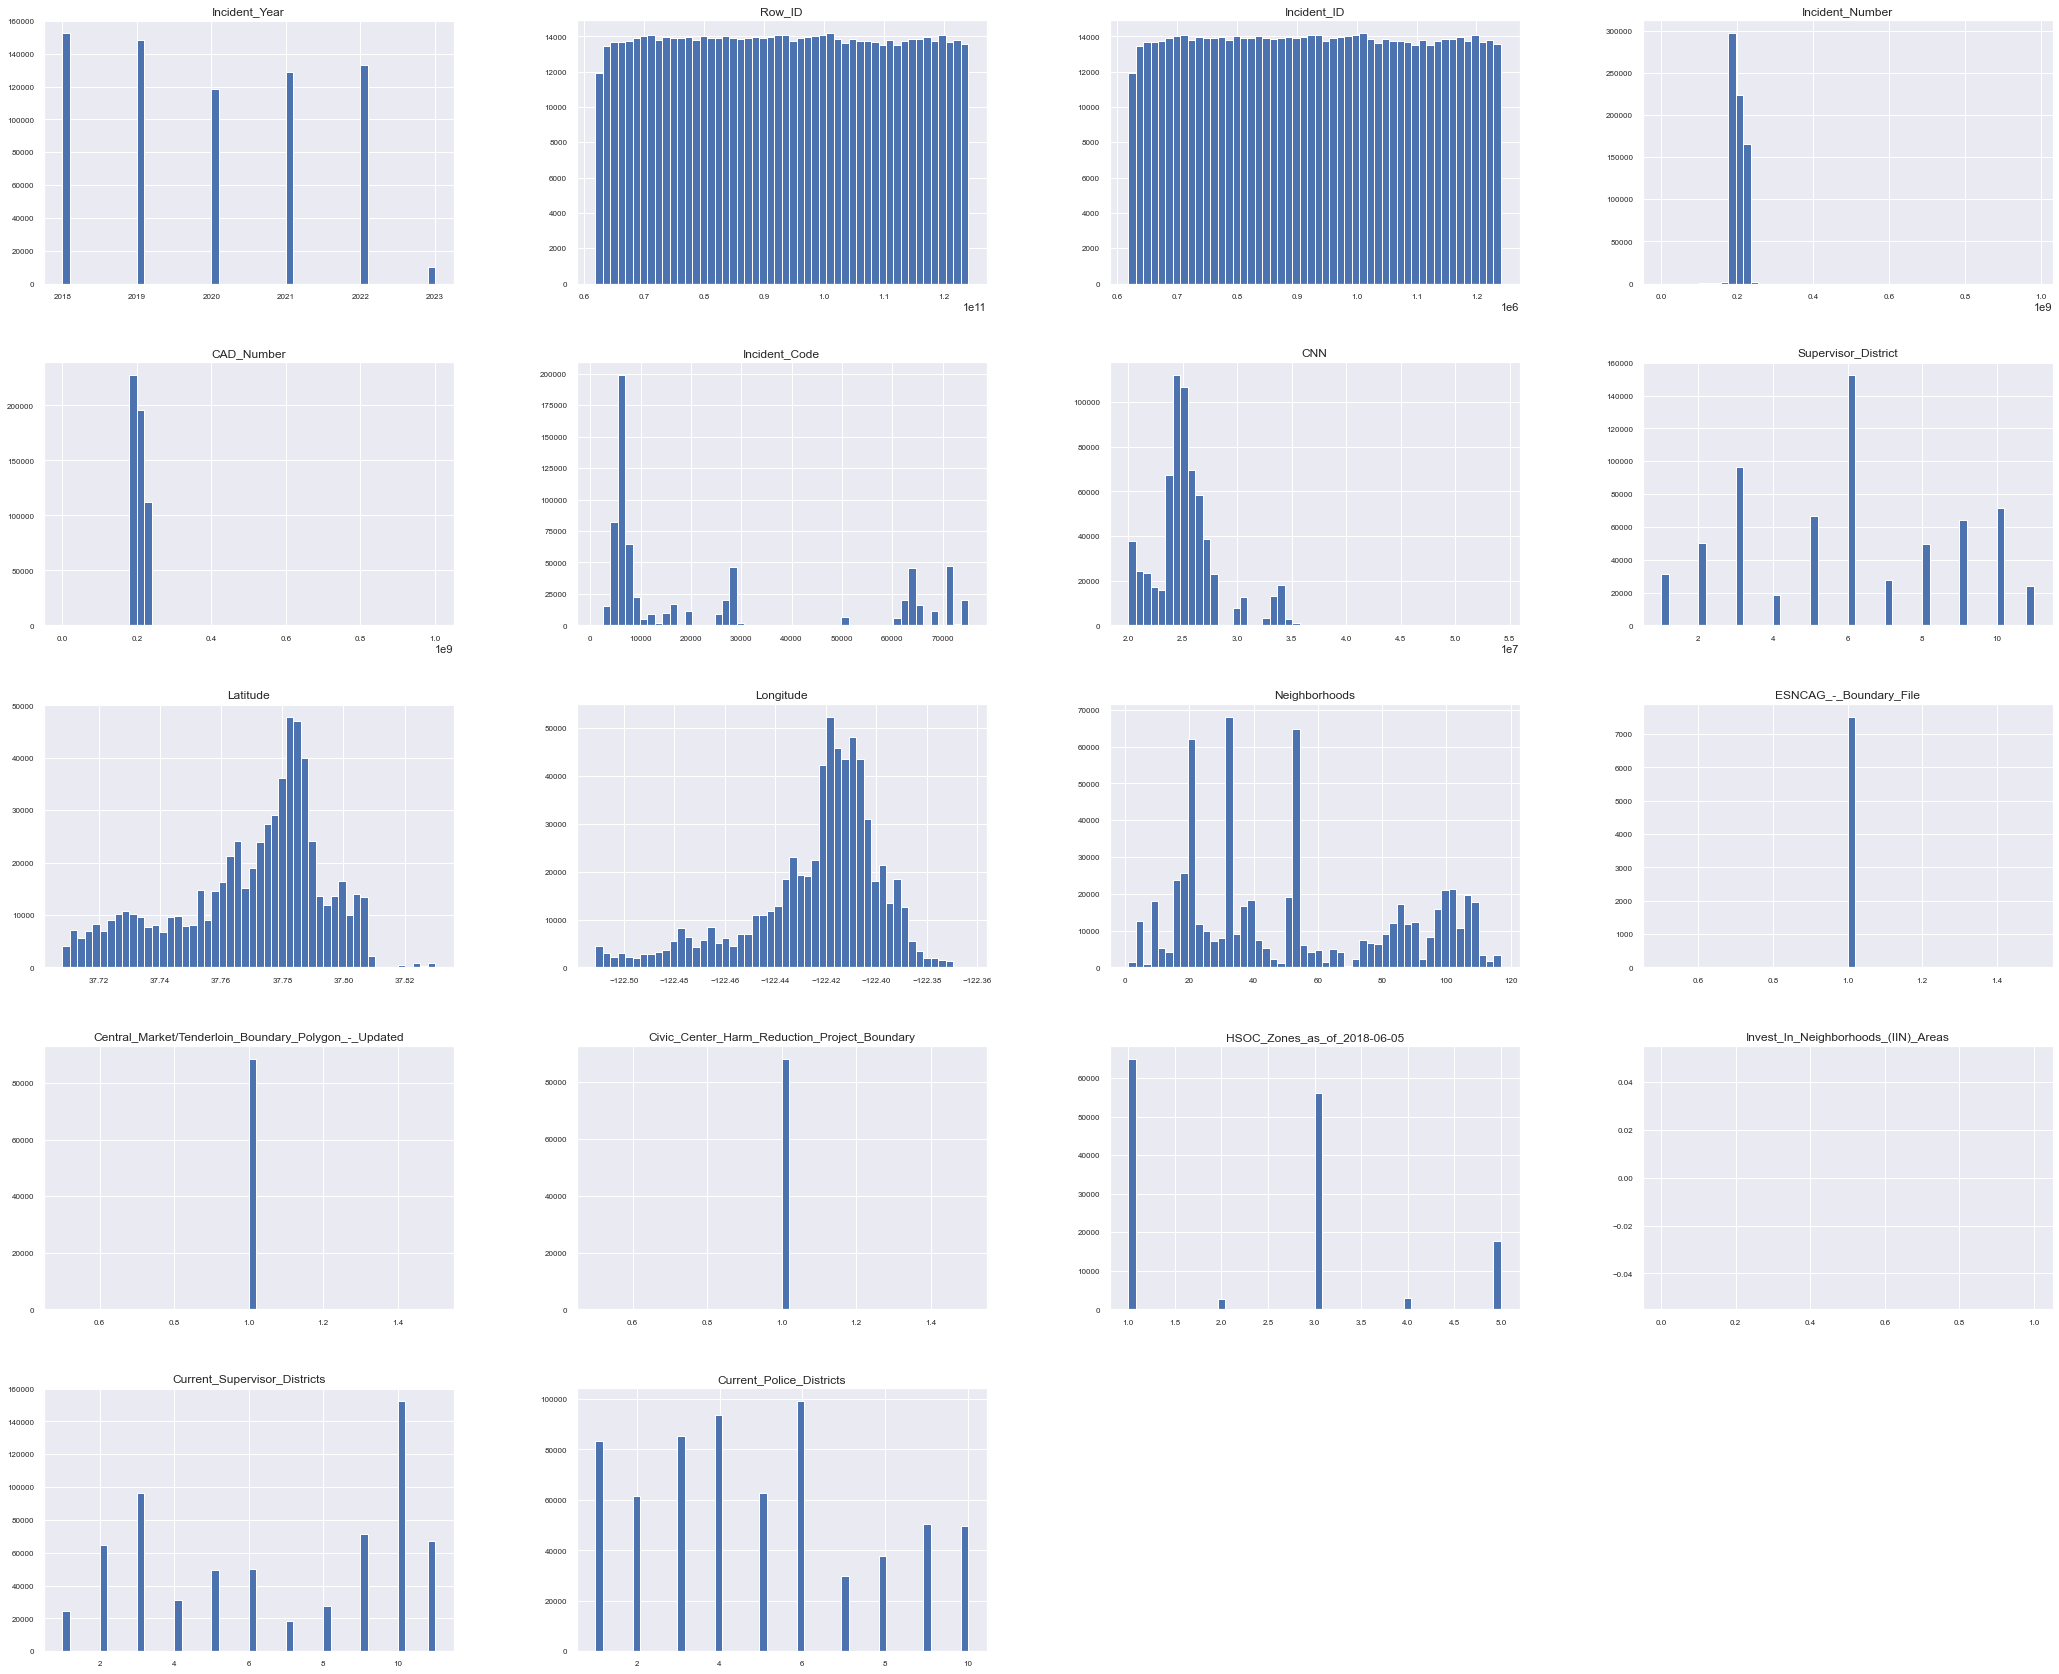

In [9]:
# visual EDA 

#plot the histogram of Incident_Category to see the distribution of the point data
sns.displot(sf_data, x="Incident_Category", height=8, aspect=15/8)

#plot the histogram of all features to see the distribution of the point data
sf_data.hist(figsize=(36, 30), bins=50, xlabelsize=8, ylabelsize=8);


## Correlation EDA

In [ ]:
# more EDA
# display all the correlated values to find outliers
for i in range(0, len(sf_data.columns), 5):
    sns.pairplot(data=sf_data, x_vars=sf_data.columns[i:i+5], y_vars=['Incident_Category'])


In [ ]:
# more correlation EDA 
corr = sf_data.drop('Incident_Category', axis=1).corr()

plt.figure(figsize=(50, 50))
# viridis color
# sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws=


### Feature selection

### Train/Test split

## Model

``Build model``

### Build and Train a Model